In [1]:
from openbabel import openbabel

In [2]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [81]:
def find_matches(library_set, test_set):
    canonical_library = pd.read_csv(library_set, sep='\t')
    canonical_test = pd.read_csv(test_set, sep='\t')
    print(1)
    
    library_codes = []
    for i in range(len(canonical_library['Canonical Code'])):
        library_codes.append(canonical_library['Canonical Code'][i])
    test_codes = []
    for i in range(len(canonical_test['Canonical Code'])):
        test_codes.append(canonical_test['Canonical Code'][i])
    print(2)
    
    matches = []
    for i in range(len(test_codes)):
        if test_codes[i] in library_codes:
            matches.append(test_codes[i])
    print(3)
    
    test_smiles = []
    test_generations = []
    library_smiles = [] 
    for i in range(len(matches)):
        for j in range(len(canonical_test['Canonical Code'])):
            if matches[i] == canonical_test['Canonical Code'][j]:
                test_smiles.append(canonical_test['Smiles'][j])
                test_generations.append(canonical_test['Generation'][j])
        for k in range(len(canonical_library['Canonical Code'])):
            if matches[i] == canonical_library['Canonical Code'][k]:
                library_smiles.append(canonical_library['Smiles'][k])
                break
    
    data = {'Generation': test_generations, 'Test Smiles': test_smiles, 'Library Smiles': library_smiles, 'Canonical Code': matches}
    df = pd.DataFrame(data)
    return(df)

In [85]:
%%time
a = find_matches('./CHO_Data/Canonical_CHO.tsv', './GlucoseAmmData/Canonical_GlucoseAmm.tsv')

1
2
3
CPU times: user 9min 49s, sys: 705 ms, total: 9min 50s
Wall time: 9min 52s


In [86]:
a.to_csv(r'GlucoseAmm_CHO.tsv', header=None, index=None, sep='\t', mode='a')

In [98]:
a

,Generation,Test Smiles,Library Smiles,Canonical Code
0,G3,C(CO)(CNCC(CO)=O)=O,C(=O)(CO[H])CNCC(=O)CO,6664d6afe5949688
1,G3,C(CN)(C(CO)(CO)O)=O,C(=O)(CN)[C@@](CO[H])(CO)O,7996bac4feaaf65b
2,G4,C(C(C=O)C(CN)(CN)O)=O,C(=O)C(C=O)[C@@](CN([H])[H])(CN)O,49ec96ee13d211fe
3,G4,C(C(CC(CN)(CN)O)=O)(O)=O,C(=O)(C(=O)O)C[C@](CN([H])[H])(CN)O,6886cd6bb1076a55
4,G4,C(CN)(CC(CN)(CN)O)=O,C(=O)(C[C@@](CN([H])[H])(CN)O)CN,914cebd4b0ce287f
5,G4,C(CN)(CC(CO)(CO)O)=O,C(=O)(C[C@@](CO[H])(CO)O)CN,d93daa61acacfe90
6,G4,C(C(CC(CN)(CN)O)=O)=O,C(=O)C(=O)C[C@](CN([H])[H])(CN)O,5d30a1b78b8faf58
7,G4,C(CN)(C(CO)CO)=O,C(=O)(CN)[C@H](CO[H])CO,16d69721b96bddd
8,G4,C(CO)(CC(CN)(CN)O)=O,C(=O)(C[C@@](CN([H])[H])(CN)O)CO,f8f14c4b07fa596f
9,G4,C(CC(CN)(CN)O)=O,C(=O)C[C@@](CN([H])[H])(CN)O,5ed2be0e256a35fc


In [107]:
def display(array):
    mols = []
    for i in range(len(array)):
        mol = Chem.MolFromSmiles(array[i])
        mols.append(mol)
    return(Draw.MolsToGridImage(mols, maxMols=100))

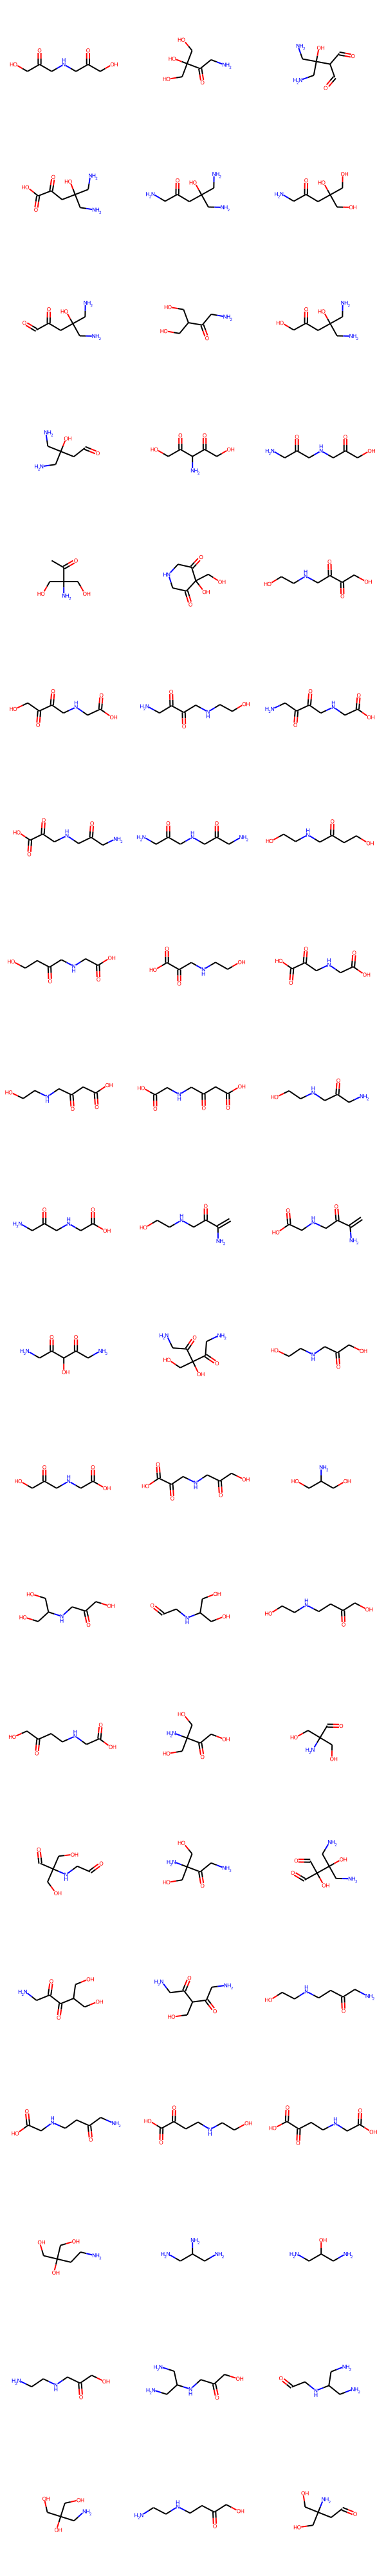

In [108]:
display(a['Test Smiles'])